In [8]:
# Imports
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import geopandas as gpd

ems_2020_rel = pd.read_csv('../graphA/mergeN.csv', usecols=['Area','2020rel'])


In [9]:

print(ems_2020_rel)

                    Area  2020rel
0            Afghanistan    69.11
1                Albania     5.45
2                Algeria    13.57
3                 Angola    46.36
4    Antigua and Barbuda     0.94
..                   ...      ...
159           Uzbekistan     3.86
160              Vanuatu    74.61
161                Yemen    31.76
162               Zambia   122.78
163             Zimbabwe    38.87

[164 rows x 2 columns]


In [10]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\pjhoor\AppData\Local\Temp\ipykernel_23760\3912264495.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


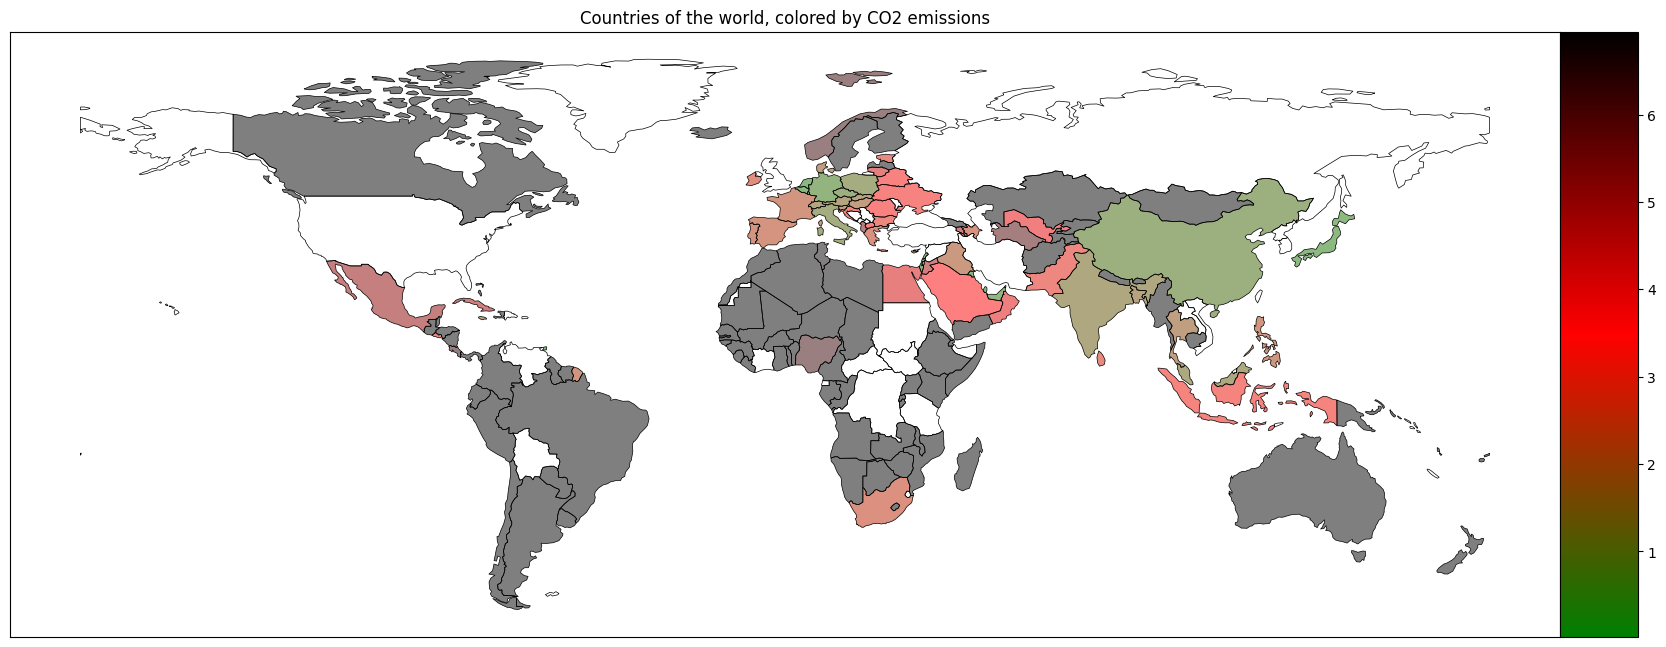

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# initialize a final empty figure
fig, ax = plt.subplots(figsize=(20, 10))

# drop "Antarctica" and "Seven seas" from the dataframe
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# Define a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom",
    [(0, "green"), (0.5, "red"), (1, "black")],
    N=256
)

# normalize the '2020rel' values to the range [0, 1] for the colormap
norm = plt.Normalize(ems_2020_rel['2020rel'].min(), ems_2020_rel['2020rel'].median())

# loop over the countries in the world dataframe
for country_name in world["name"].unique():
    # grab all countries that belong to the continent
    country = world[world["name"] == country_name]

    # check if the country is in the ems_2020_rel dataframe
    if country_name in ems_2020_rel['Area'].values:
        # get the '2020rel' value for the country
        rel_value = ems_2020_rel[ems_2020_rel['Area'] == country_name]['2020rel'].values[0]

        # get the color corresponding to the '2020rel' value
        color = cmap(norm(rel_value))
    else:
        # if the country is not in the ems_2020_rel dataframe, use white color
        color = 'white'

    # plot the country with the color
    country.plot(ax=ax, color=color, alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Countries of the world, colored by CO2 emissions")

# create a colorbar as the legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.036, pad=0.1, aspect = 30, cax=ax.inset_axes([1.0, 0, 0.05, 1]))

plt.show()